<a href="https://colab.research.google.com/github/Profian1/AI-for-SDG2-Crop-Recommender/blob/main/AI_Tools_and_Frameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Task 1: Classical ML with Scikit-learn
# 1. Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 2. Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 5.Predict & Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.8888 - loss: 0.3594 - val_accuracy: 0.9843 - val_loss: 0.0580
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.9873 - val_loss: 0.0466
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.9903 - loss: 0.0289 - val_accuracy: 0.9898 - val_loss: 0.0413
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.9930 - loss: 0.0212 - val_accuracy: 0.9895 - val_loss: 0.0396
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 63ms/step - accuracy: 0.9954 - loss: 0.0146 - val_accuracy: 0.9882 - val_loss: 0.0369
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9834 - loss: 0.0552
Test accuracy: 0.9871000051498413


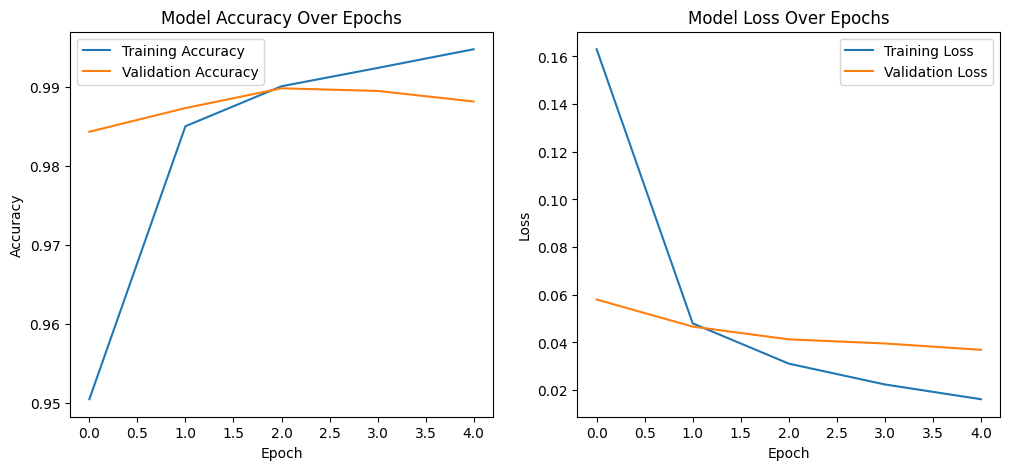

In [7]:
#Task 2: Deep Learning with TensorFlow/PyTorch
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Build model
model = models.Sequential([
    layers.Reshape((28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train model and store history
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1,
    batch_size=64,
    verbose=1
)

# 5. Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# 6. Plot accuracy and loss graphs
plt.figure(figsize=(12, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [5]:
#Task 3: NLP with spaCy
import spacy
# Download and load the small English model
nlp = spacy.load("en_core_web_sm")
reviews = [
    "The new Samsung Galaxy S23 Ultra is amazing, great camera.",
    "I bought a defective Apple Watch Series 8 from an unauthorized seller.",
    "This product is terrible; the instructions were unclear and it broke.",
]
# Iterate through reviews and extract entities
for review in reviews:
    doc = nlp(review)
    print(f"Review: {review}")
    # Filter for relevant entities (e.g., ORG, PRODUCT, etc. - you may need to check the model's labels)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ['ORG', 'PRODUCT', 'WORK_OF_ART']]
    print(f"Entities: {entities}\n")
    # Simple rule-based sentiment dictionary
positive_words = ["amazing", "great", "good", "excellent", "works"]
negative_words = ["defective", "terrible", "unclear", "broke", "bad"]

def get_sentiment(text):
    doc = nlp(text.lower())
    pos_count = sum(1 for token in doc if token.text in positive_words)
    neg_count = sum(1 for token in doc if token.text in negative_words)

    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

# Test the function on the reviews
for review in reviews:
    sentiment = get_sentiment(review)
    print(f"Review: '{review}' -> Sentiment: {sentiment}")

Review: The new Samsung Galaxy S23 Ultra is amazing, great camera.
Entities: [('Samsung Galaxy S23 Ultra', 'ORG')]

Review: I bought a defective Apple Watch Series 8 from an unauthorized seller.
Entities: [('Apple Watch Series', 'ORG')]

Review: This product is terrible; the instructions were unclear and it broke.
Entities: []

Review: 'The new Samsung Galaxy S23 Ultra is amazing, great camera.' -> Sentiment: Positive
Review: 'I bought a defective Apple Watch Series 8 from an unauthorized seller.' -> Sentiment: Negative
Review: 'This product is terrible; the instructions were unclear and it broke.' -> Sentiment: Negative
